# 1. Loading the Packages

In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline


# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

# 2. Problem Formulation - What are we trying to solve?

We want to predict if a customer will churn or not

# 3. Reading / Loading the Raw Data into Python from CSV

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the data
raw_data = pd.read_csv('/content/Customer-Churn-Records.csv', encoding='latin-1')

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(10000, 18)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# 4. Data Exploration

In [9]:
# Split the dataframe into two dataframes, each containing 5000 rows
train_test_df = raw_data.iloc[:5000]
validation_df = raw_data.iloc[5000:10000]

# Save these dataframes to separate Excel files if needed
train_test_df.to_excel('train_test_df.xlsx', index=False)
validation_df.to_excel('validation_df.xlsx', index=False)


In [6]:
#first 5 rows of the data frame
train_test_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [7]:
#first 5 rows of the data frame
validation_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
5000,5001,15598695,Fields,834,Germany,Female,68,9,130169.27,2,0,1,93112.20,0,0,5,GOLD,882
5001,5002,15649354,Johnston,754,Spain,Male,35,4,0.00,2,1,1,9658.41,0,0,1,SILVER,474
5002,5003,15737556,Vasilyev,590,France,Male,43,7,81076.80,2,1,1,182627.25,1,1,1,DIAMOND,253
5003,5004,15671610,Hooper,740,France,Male,36,7,0.00,1,1,1,13177.40,0,0,5,SILVER,466
5004,5005,15625092,Colombo,502,Germany,Female,57,3,101465.31,1,1,0,43568.31,1,1,5,SILVER,882


In [10]:
train_test_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,1.569033e+07,650.245400,38.988600,5.009200,77051.932626,1.523200,0.708600,0.51000,100343.748618,0.209200,0.210000,3.007600,604.326400
std,1443.520003,7.158643e+04,97.529306,10.598327,2.879579,62417.714791,0.582005,0.454453,0.49995,57708.381821,0.406778,0.407349,1.400834,227.222966
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.00000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,1250.750000,1.562816e+07,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.00000,50870.902500,0.000000,0.000000,2.000000,406.000000
50%,2500.500000,1.569001e+07,652.000000,37.000000,5.000000,97466.985000,1.000000,1.000000,1.00000,100579.380000,0.000000,0.000000,3.000000,604.000000
75%,3750.250000,1.575235e+07,717.250000,44.000000,7.000000,128032.042500,2.000000,1.000000,1.00000,149107.817500,0.000000,0.000000,4.000000,798.000000
max,5000.000000,1.581566e+07,850.000000,88.000000,10.000000,250898.090000,4.000000,1.000000,1.00000,199970.740000,1.000000,1.000000,5.000000,1000.000000


In [11]:
# checking datatypes
train_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           5000 non-null   int64  
 1   CustomerId          5000 non-null   int64  
 2   Surname             5000 non-null   object 
 3   CreditScore         5000 non-null   int64  
 4   Geography           5000 non-null   object 
 5   Gender              5000 non-null   object 
 6   Age                 5000 non-null   int64  
 7   Tenure              5000 non-null   int64  
 8   Balance             5000 non-null   float64
 9   NumOfProducts       5000 non-null   int64  
 10  HasCrCard           5000 non-null   int64  
 11  IsActiveMember      5000 non-null   int64  
 12  EstimatedSalary     5000 non-null   float64
 13  Exited              5000 non-null   int64  
 14  Complain            5000 non-null   int64  
 15  Satisfaction Score  5000 non-null   int64  
 16  Card T

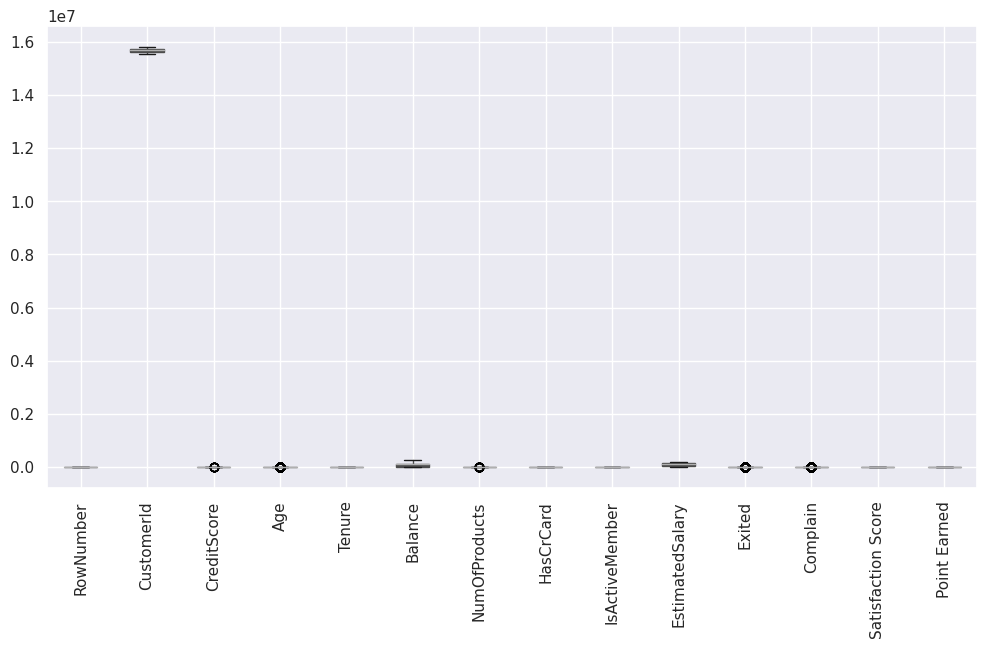

In [13]:
#Detecting Outliers using Tukey Boxplot

plt.figure(figsize=(12,6))
bplot = train_test_df.boxplot(patch_artist=True)
plt.xticks(rotation=90)
plt.show()

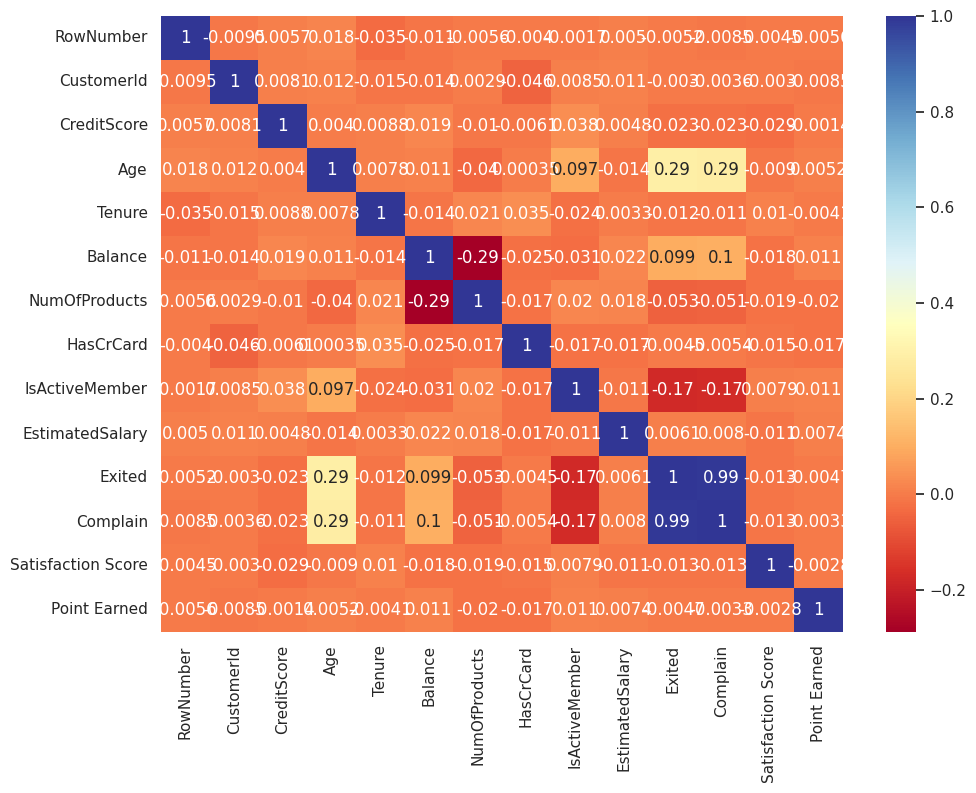

In [14]:
#Checking Correlation

plt.subplots(figsize=(11,8))
sns.heatmap(train_test_df.corr(), annot=True, cmap="RdYlBu")
plt.show()

In [19]:
train_test_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,1.569033e+07,650.245400,38.988600,5.009200,77051.932626,1.523200,0.708600,0.51000,100343.748618,0.209200,0.210000,3.007600,604.326400
std,1443.520003,7.158643e+04,97.529306,10.598327,2.879579,62417.714791,0.582005,0.454453,0.49995,57708.381821,0.406778,0.407349,1.400834,227.222966
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.00000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,1250.750000,1.562816e+07,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.00000,50870.902500,0.000000,0.000000,2.000000,406.000000
50%,2500.500000,1.569001e+07,652.000000,37.000000,5.000000,97466.985000,1.000000,1.000000,1.00000,100579.380000,0.000000,0.000000,3.000000,604.000000
75%,3750.250000,1.575235e+07,717.250000,44.000000,7.000000,128032.042500,2.000000,1.000000,1.00000,149107.817500,0.000000,0.000000,4.000000,798.000000
max,5000.000000,1.581566e+07,850.000000,88.000000,10.000000,250898.090000,4.000000,1.000000,1.00000,199970.740000,1.000000,1.000000,5.000000,1000.000000


In [29]:
Retained_Gender_F = train_test_df[(train_test_df['Gender']=='Female')&(train_test_df['Exited'] ==0)]
Retained_Gender_M = train_test_df[(train_test_df['Gender']=='Male')&(train_test_df['Exited'] ==0)]

Exited_Gender_F = train_test_df[(train_test_df['Gender']=='Female')&(train_test_df['Exited'] ==1)]
Exited_Gender_M = train_test_df[(train_test_df['Gender']=='Male')&(train_test_df['Exited'] ==1)]

Retained_Gender_F = len(Retained_Gender_F)
Retained_Gender_M = len(Retained_Gender_M)

Exited_Gender_F = len(Exited_Gender_F)
Exited_Gender_M = len(Exited_Gender_M)

print(f"The number of Female still buying product: {Retained_Gender_F}")
print(f"The number of Males still buying product: {Retained_Gender_F}")
print(f"The number of Females not buying product: {Exited_Gender_F}")
print(f"The number of Males not buying product: {Exited_Gender_M}")

The number of Female still buying product: 1720
The number of Males still buying product: 1720
The number of Females not buying product: 597
The number of Males not buying product: 449


In [30]:
Exited_Geo_Age_IsActiveMember = train_test_df[(train_test_df['Geography'] == 'Germany')&(train_test_df['Age'] <=40)&(train_test_df['IsActiveMember']== 1)&(train_test_df['Exited'] ==1)]
Exited_Geo_Age_IsActiveMember_1 = train_test_df[(train_test_df['Geography'] == 'France')&(train_test_df['Age'] <=40)&(train_test_df['IsActiveMember']== 1)&(train_test_df['Exited'] ==1)]
Exited_Geo_Age_IsActiveMember_2 = train_test_df[(train_test_df['Geography'] == 'Spain')&(train_test_df['Age'] <=40)&(train_test_df['IsActiveMember']== 1)&(train_test_df['Exited'] ==1)]


Exited_Geo_Age_IsActiveMember = len(Exited_Geo_Age_IsActiveMember)
Exited_Geo_Age_IsActiveMember_1 = len(Exited_Geo_Age_IsActiveMember_1)
Exited_Geo_Age_IsActiveMember_2 = len(Exited_Geo_Age_IsActiveMember_2)

print(f"The number of Customers under forty YO in Germany not buying product: {Exited_Geo_Age_IsActiveMember}")
print(f"The number of Customers under forty YO in France not buying product: {Exited_Geo_Age_IsActiveMember_1}")
print(f"The number of Customers under forty YO in Spain not buying product: {Exited_Geo_Age_IsActiveMember_2}")


The number of Customers under forty YO in Germany not buying product: 46
The number of Customers under forty YO in France not buying product: 49
The number of Customers under forty YO in Spain not buying product: 23


In [21]:
train_test_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


In [17]:
print(train_test_df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')


In [ ]:
Retained_Age = train_test_df[(train_test_df['Age'] <=40)&(train_test_df['Exited'] ==1)]
Retained_Age_1 = train_test_df[(train_test_df['Age'] <=40)&(train_test_df['Exited'] ==1)]
Retained_Age_2 = train_test_df[(train_test_df['Age'] <=40)&(train_test_df['Exited'] ==1)]
Retained_Age_2 = train_test_df[(train_test_df['Age'] <=40)&(train_test_df['Exited'] ==1)]


Exited_Geo_Age_IsActiveMember = len(Exited_Geo_Age_IsActiveMember)
Exited_Geo_Age_IsActiveMember_1 = len(Exited_Geo_Age_IsActiveMember_1)
Exited_Geo_Age_IsActiveMember_2 = len(Exited_Geo_Age_IsActiveMember_2)

print(f"The number of Customers under forty YO in Germany not buying product: {Exited_Geo_Age_IsActiveMember}")
print(f"The number of Customers under forty YO in France not buying product: {Exited_Geo_Age_IsActiveMember_1}")
print(f"The number of Customers under forty YO in Spain not buying product: {Exited_Geo_Age_IsActiveMember_2}")

In [31]:
#Inserting new column with percental range of age
train_test_bin = train_test_df[['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned']].copy()
train_test_bin.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [36]:
#Inserting new column with percental range of age
train_test_bin['Age_Category'] = pd.cut(train_test_bin['Age'], bins=[18, 26, 42, 58, 77, float('inf')], labels=['GenZ', 'Millennials', 'GenX', 'Baby Boomers','Silent Generation'])

In [39]:
train_test_bin.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age_Category
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,Millennials
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,Millennials
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,Millennials
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,Millennials
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,GenX


In [43]:
Retained_Age_Category = train_test_bin[(train_test_bin['Age_Category'] == 'GenZ')&(train_test_bin['Exited'] ==0)]
Retained_Age_Category_1 = train_test_bin[(train_test_bin['Age_Category'] == 'Millennials')&(train_test_bin['Exited'] ==0)]
Retained_Age_Category_2 = train_test_bin[(train_test_bin['Age_Category'] == 'GenX')&(train_test_bin['Exited'] ==0)]
Retained_Age_Category_3 = train_test_bin[(train_test_bin['Age_Category'] == 'Baby Boomers')&(train_test_bin['Exited'] ==0)]
Retained_Age_Category_4 = train_test_bin[(train_test_bin['Age_Category'] == 'Silent Generation')&(train_test_bin['Exited'] ==0)]

Retained_Age_Category = len(Retained_Age_Category)
Retained_Age_Category_1 = len(Retained_Age_Category_1)
Retained_Age_Category_2 = len(Retained_Age_Category_2)
Retained_Age_Category_3 = len(Retained_Age_Category_3)
Retained_Age_Category_4 = len(Retained_Age_Category_4)

print(f"The number of GenZ of Customers is still buying product: {Retained_Age_Category}")
print(f"The number of Millennials of Customers is still buying product: {Retained_Age_Category_1}")
print(f"The number of GenX of Customers is still buying product: {Retained_Age_Category_2}")
print(f"The number of Baby Boomers of Customers is still buying product: {Retained_Age_Category_3}")
print(f"The number of Silent Generation of Customers is still buying product: {Retained_Age_Category_4}")

The number of GenZ of Customers is still buying product: 384
The number of Millennials of Customers is still buying product: 2707
The number of GenX of Customers is still buying product: 643
The number of Baby Boomers of Customers is still buying product: 198
The number of Silent Generation of Customers is still buying product: 11


# 5. Data Pre-Processing Phase

In [44]:
# Checking for null values
train_test_df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [45]:
# Investigate all the elements whithin each Feature

for column in train_test_df:
    unique_vals = np.unique(train_test_df[column])
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature RowNumber :5000
The number of values for feature CustomerId :5000
The number of values for feature Surname :2048
The number of values for feature CreditScore :443
The number of values for feature Geography :3 -- ['France' 'Germany' 'Spain']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Age :68
The number of values for feature Tenure :11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Balance :3214
The number of values for feature NumOfProducts :4 -- [1 2 3 4]
The number of values for feature HasCrCard :2 -- [0 1]
The number of values for feature IsActiveMember :2 -- [0 1]
The number of values for feature EstimatedSalary :4999
The number of values for feature Exited :2 -- [0 1]
The number of values for feature Complain :2 -- [0 1]
The number of values for feature Satisfaction Score :5 -- [1 2 3 4 5]
The number of values for feature Card Type :4 -- ['DIAMOND' 'GOLD' 'PLATINUM' 'SILV

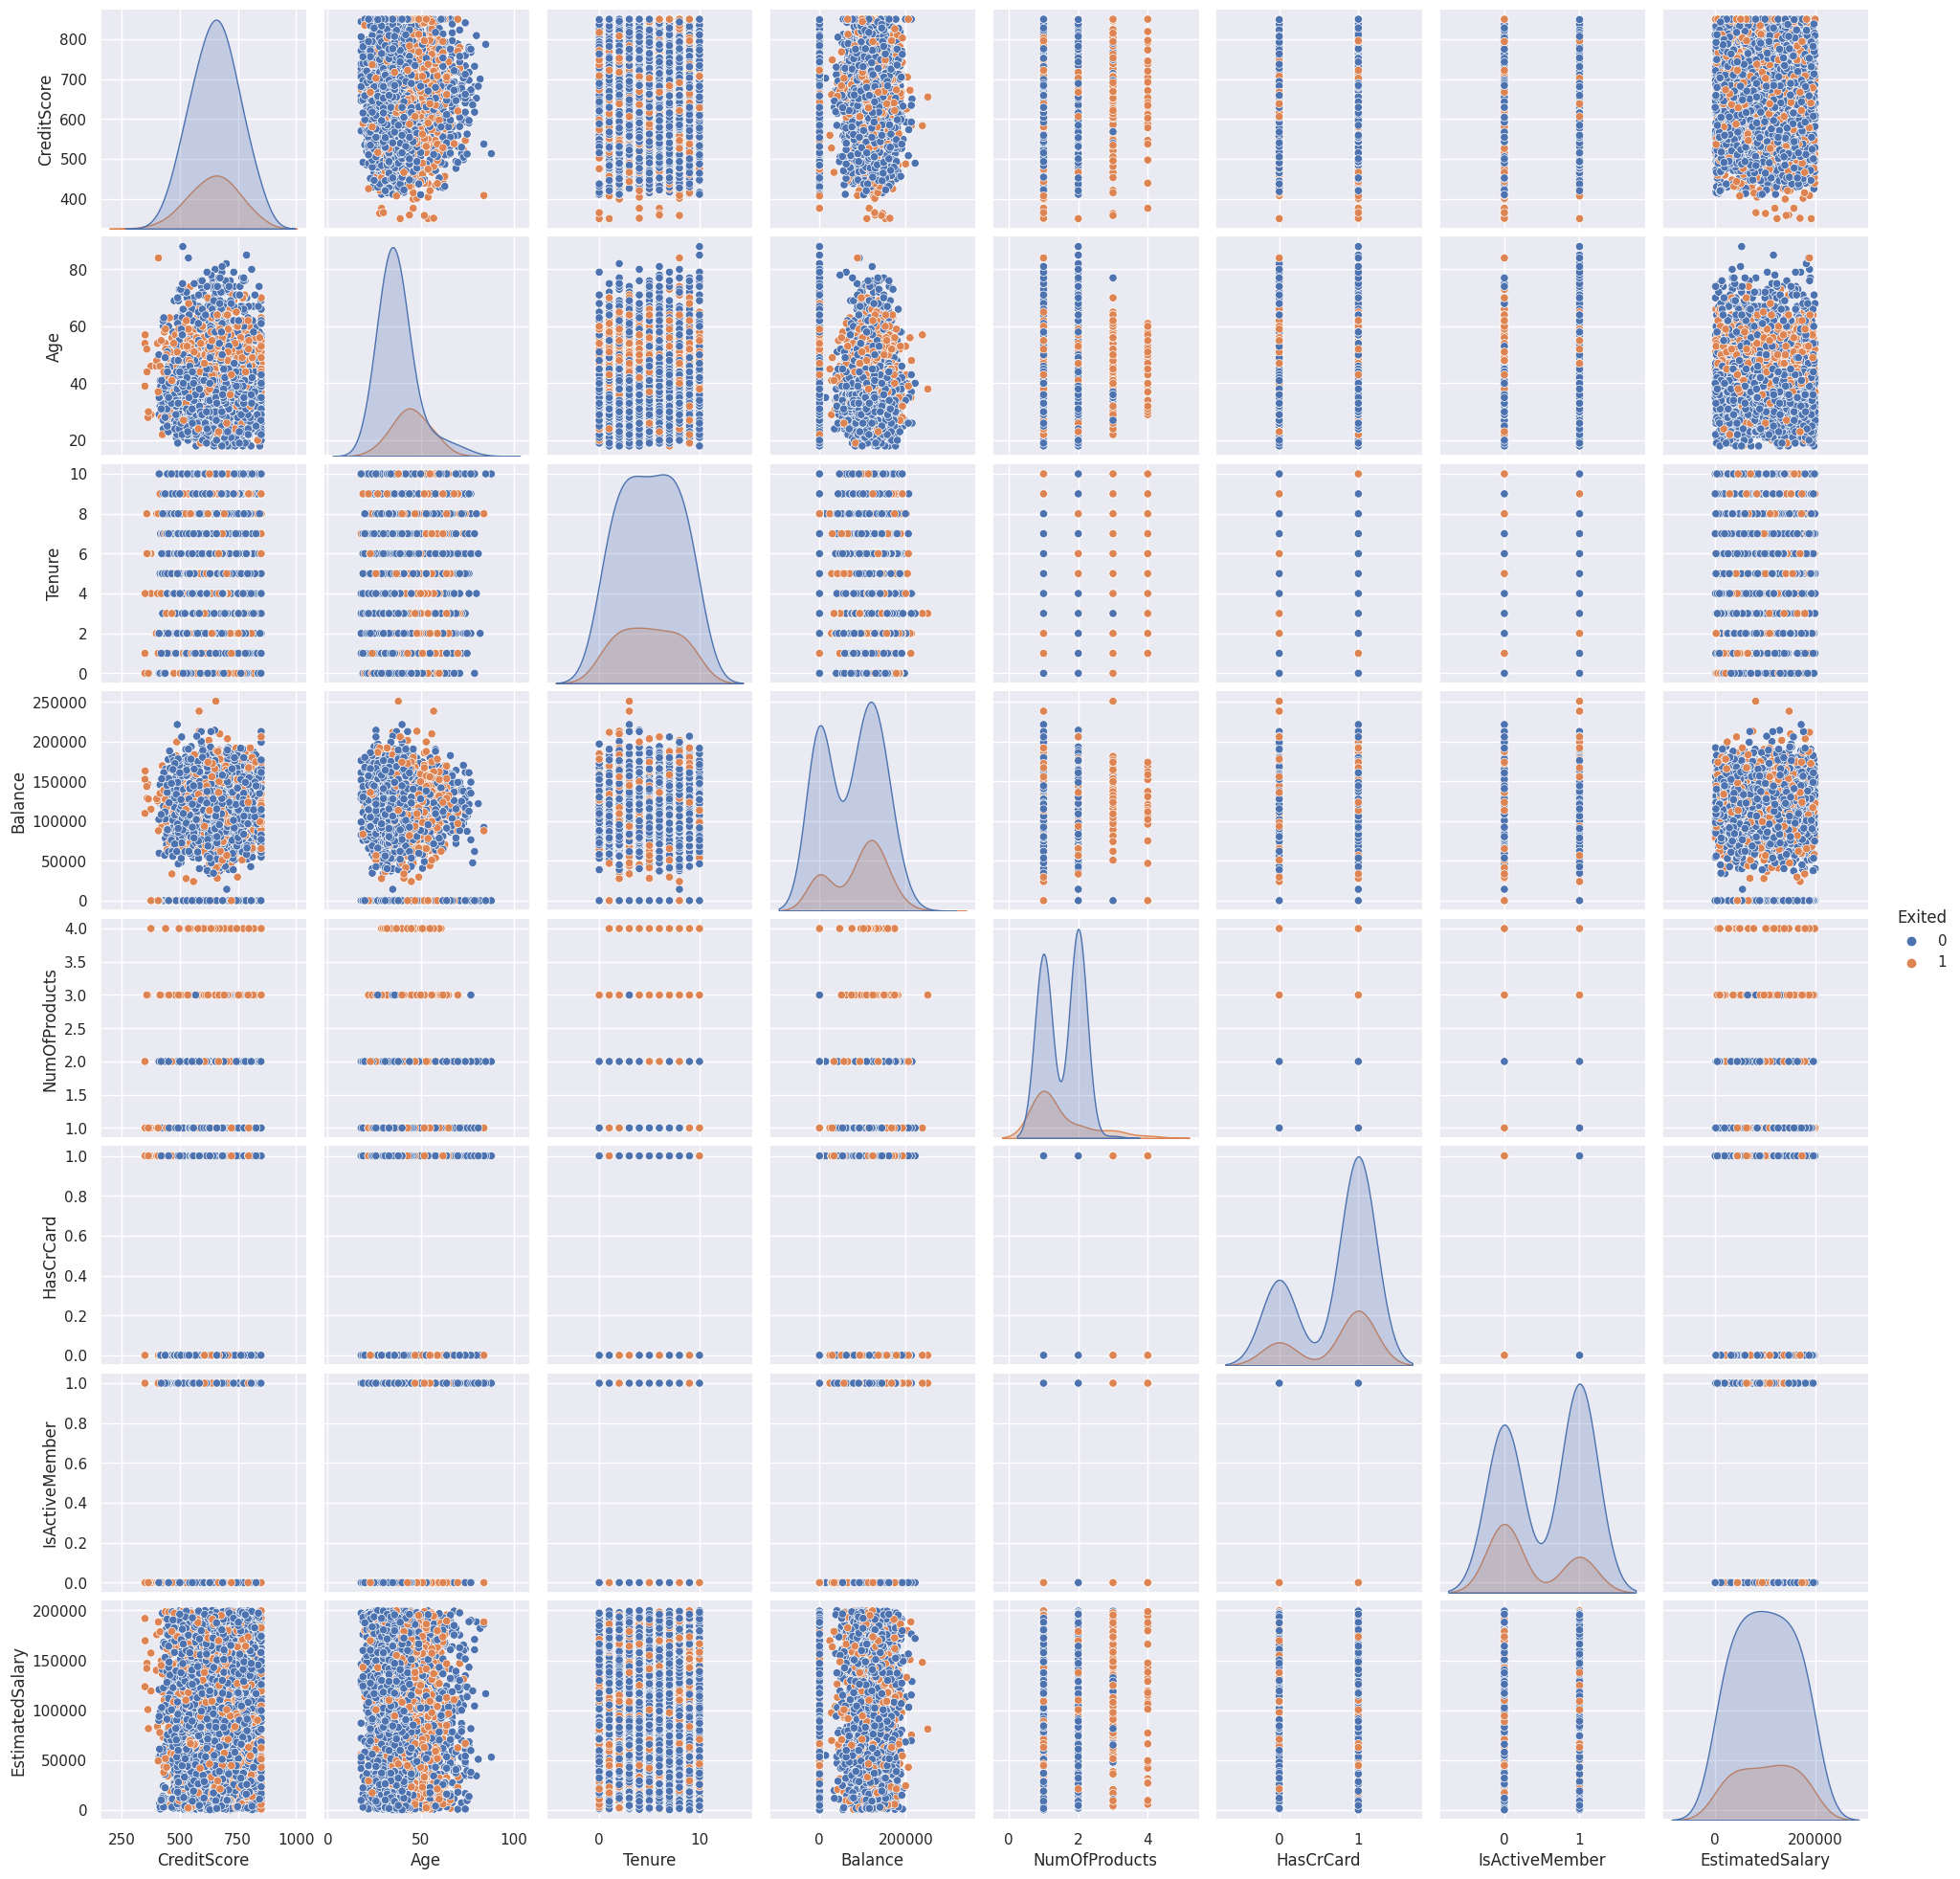

In [47]:
# Limiting the data
train_test_lim = train_test_df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]

# Visualize the data using seaborn Pairplots
g = sns.pairplot(train_test_lim, hue = 'Exited', diag_kws={'bw': 0.5})
plt.savefig('pairplot.png')

In [50]:
# Investigate all the features by our y

features = ['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember']


for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data=train_test_lim, hue = 'Exited', palette="Set1")
    plt.title(f'Countplot for {f} by Exited')

    # Save the countplot to a file (e.g., a PNG file)
    plt.savefig(f'countplot_{f}.png')

    # Close the current figure to free up memory
    plt.close()

In [51]:
train_test_lim.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
 # Making categorical variables into numeric representation

train_test_lim_new = pd.get_dummies(train_test_lim, columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])
train_test_lim_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,0,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0,0,1,0,1


In [53]:
# Scaling columns

scale_vars = ['CreditScore','EstimatedSalary','Balance','Age']
scaler = MinMaxScaler()
train_test_lim_new[scale_vars] = scaler.fit_transform(train_test_lim_new[scale_vars])
train_test_lim_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.538,0.342857,2,0.000000,1,0.506790,1,1,0,0,1,0,0,1,0,1
1,0.516,0.328571,1,0.334031,1,0.562770,0,0,0,1,1,0,1,0,0,1
2,0.304,0.342857,8,0.636357,3,0.569716,1,1,0,0,1,0,0,1,1,0
3,0.698,0.300000,1,0.000000,2,0.469171,0,1,0,0,1,0,1,0,1,0
4,1.000,0.357143,2,0.500246,1,0.395443,0,0,0,1,1,0,0,1,0,1


# 6. Splitting the train test limit new - Hold-out validation

In [54]:
# Splitting Data
X = train_test_lim_new.drop('Exited', axis=1).values# Input features (attributes)
y = train_test_lim_new['Exited'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)

X shape: (5000, 15)
y shape: (5000,)


# 7. Running Decision Tree

In [55]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

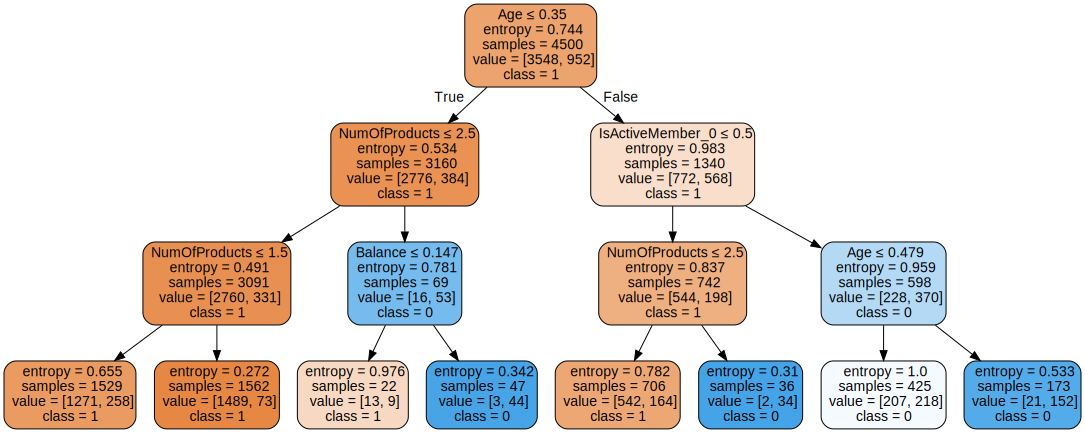

In [58]:
import graphviz

dot_data = tree.export_graphviz(dt, out_file=None,
    feature_names=train_test_lim_new.drop('Exited', axis=1).columns,
    class_names=train_test_lim_new['Exited'].unique().astype(str),
    filled=True, rounded=True,
    special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree_graph")

graph

In [64]:
#del final_fi

# Calculating FI
for i, column in enumerate(train_test_lim_new.drop('Exited', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))

    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})

    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi


# Ordering the data
final_fi

Importance of feature CreditScore:, 0.000
Importance of feature Age:, 0.499
Importance of feature Tenure:, 0.000
Importance of feature Balance:, 0.020
Importance of feature NumOfProducts:, 0.327
Importance of feature EstimatedSalary:, 0.000
Importance of feature Geography_France:, 0.000
Importance of feature Geography_Germany:, 0.000
Importance of feature Geography_Spain:, 0.000
Importance of feature Gender_Female:, 0.000
Importance of feature Gender_Male:, 0.000
Importance of feature HasCrCard_0:, 0.000
Importance of feature HasCrCard_1:, 0.000
Importance of feature IsActiveMember_0:, 0.153
Importance of feature IsActiveMember_1:, 0.000


,level_0,index,Variable,Feature Importance Score
0,0.0,1.0,Age,0.499493
1,16.0,NaN,Age,0.499493
2,19.0,NaN,NumOfProducts,0.327419
3,1.0,4.0,NumOfProducts,0.327419
4,2.0,13.0,IsActiveMember_0,0.152803
...,...,...,...,...
85,NaN,NaN,Gender_Male,0.000000
86,NaN,NaN,HasCrCard_0,0.000000
87,NaN,NaN,HasCrCard_1,0.000000
88,NaN,NaN,IsActiveMember_0,0.152803


In [65]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, y_test))

Training Accuracy is:  0.8362222222222222
Testing Accuracy is:  0.854


In [66]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

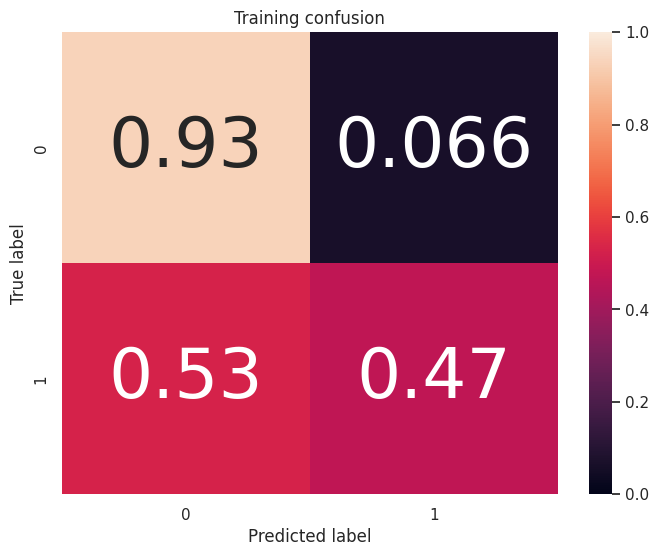

In [87]:
y_pred = dt.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')
# Save the countplot to a file (e.g., a PNG file)
plt.savefig('confusion_matrix_decisiontree.png')

In [68]:
y_pred = dt.predict(X_train)
y_pred
confusion_matrix(y_train, y_pred)

array([[3315,  233],
       [ 504,  448]])

In [69]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print ("The False Alarm rate per class is: ",FPR)

# False negative rate or Miss Rate
FNR = FN/(TP+FN)
print ("The Miss Rate rate per class is: ",FNR)

# Classification error
CER = (FP+FN)/(TP+FP+FN+TN)
print ("The Classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print ("The Accuracy of each class is", ACC)
print("")

##Total averages :
print ("The average Recall is: ",TPR.sum()/2)
print ("The average Precision is: ",PPV.sum()/2)
print ("The average False Alarm is: ",FPR.sum()/2)
print ("The average Miss Rate rate is: ",FNR.sum()/2)
print ("The average Classification error is", CER.sum()/2)
print ("The average Accuracy is", ACC.sum()/2)

The True Positive rate / Recall per class is:  [0.934329 0.470588]
The Precision per class is:  [0.868028 0.657856]
The False Alarm rate per class is:  [0.529412 0.065671]
The Miss Rate rate per class is:  [0.065671 0.529412]
The Classification error of each class is [0.163778 0.163778]
The Accuracy of each class is [0.836222 0.836222]

The average Recall is:  0.7024587174215797
The average Precision is:  0.7629421868169008
The average False Alarm is:  0.29754128257842033
The average Miss Rate rate is:  0.29754128257842033
The average Classification error is 0.16377777777777777
The average Accuracy is 0.8362222222222222


# 8. Running Random Forest

Training Accuracy is:  1.0
Testing Accuracy is:  0.856


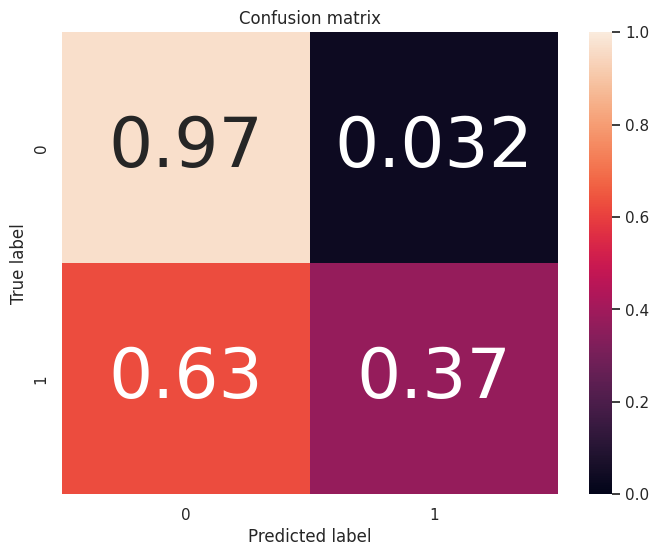

In [88]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)
plt.savefig('confusion_matrix_randomforest.png')

Classification accuracy on test set with max features = 1 and max_depth = None: 0.850
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.812
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.812
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.816
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.826
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.860
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.824
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.832
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.838
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.858
Classification accuracy on test set with max features = log2 and max_depth = None: 0.860
Classification accuracy on test set with max features = log2

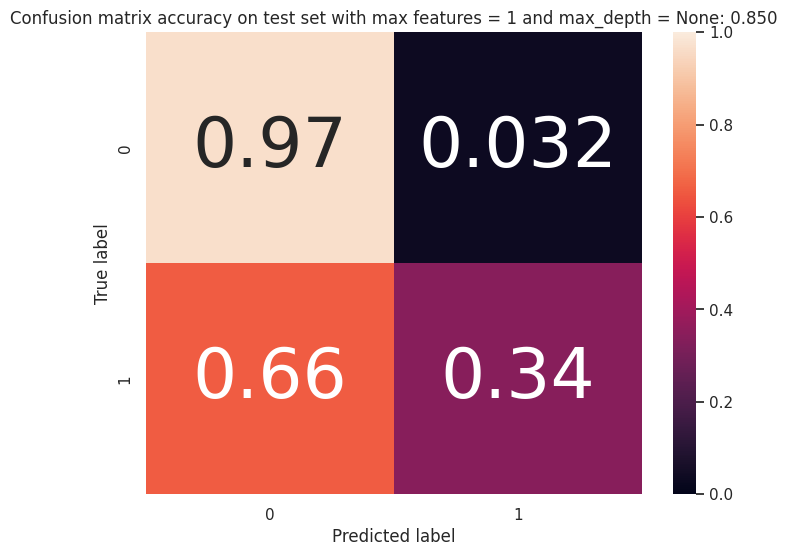

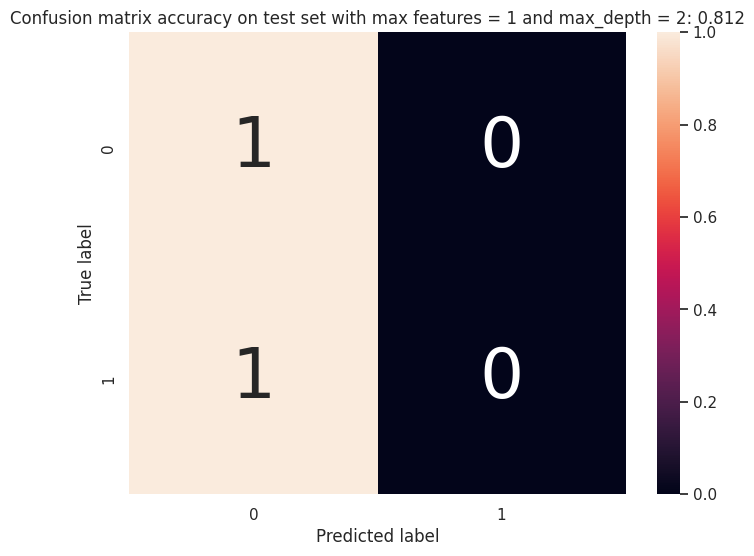

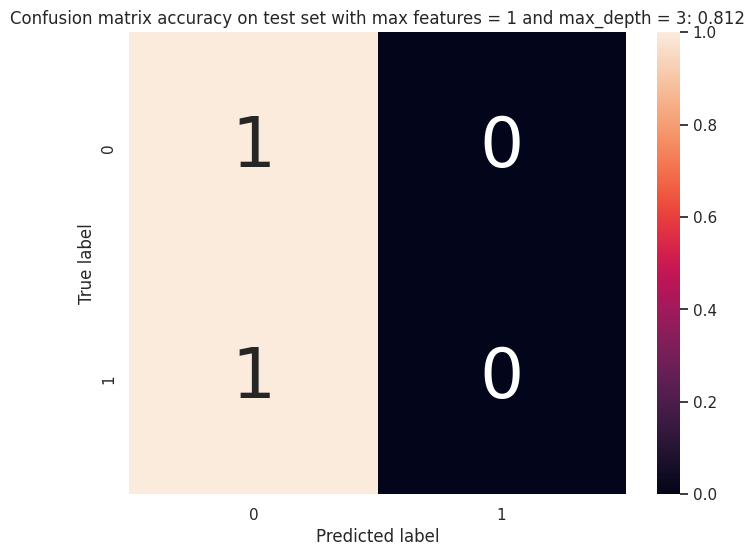

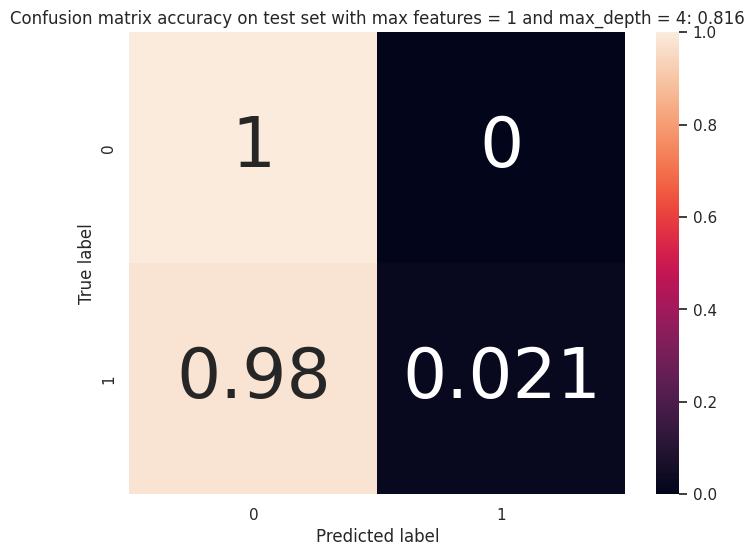

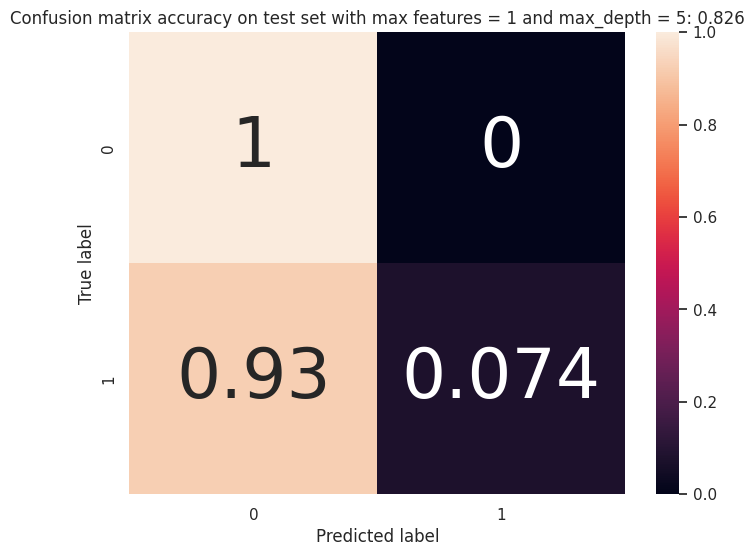

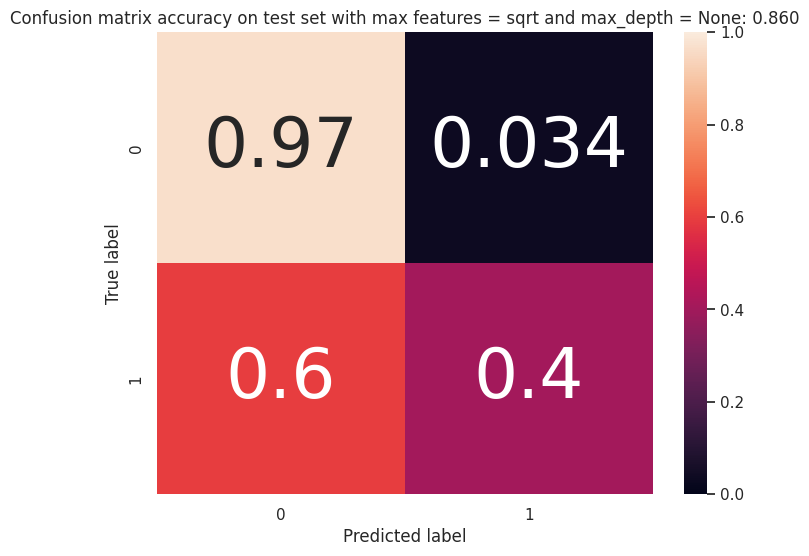

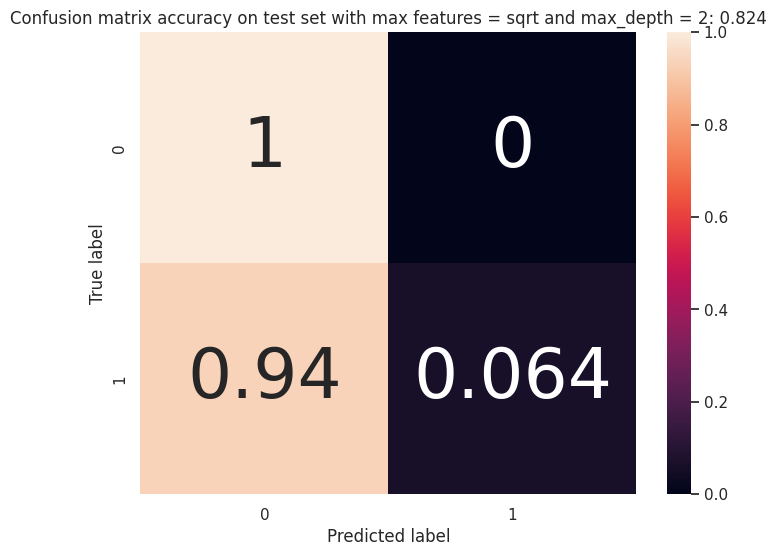

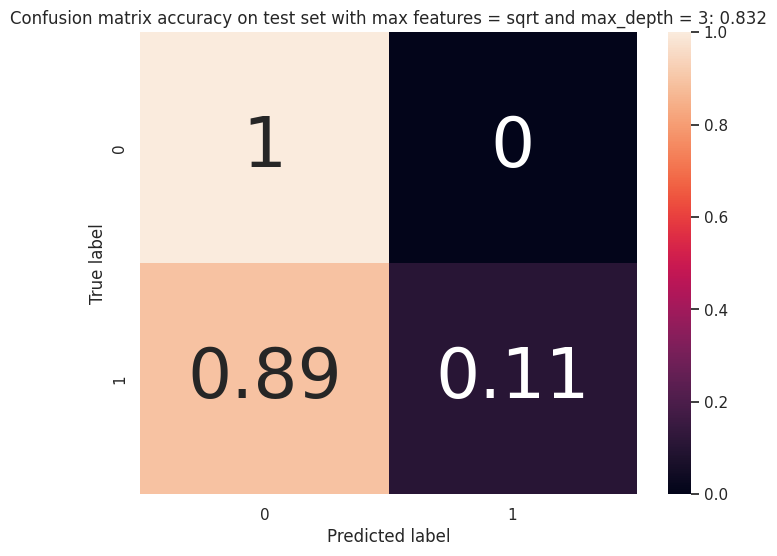

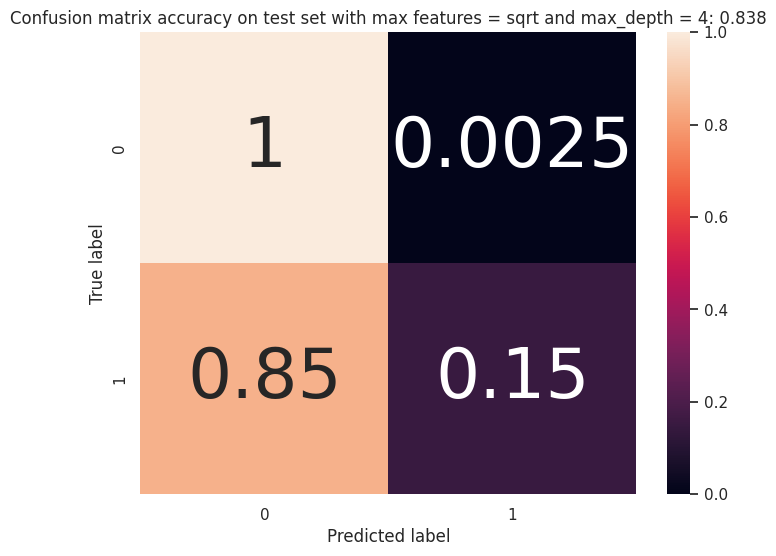

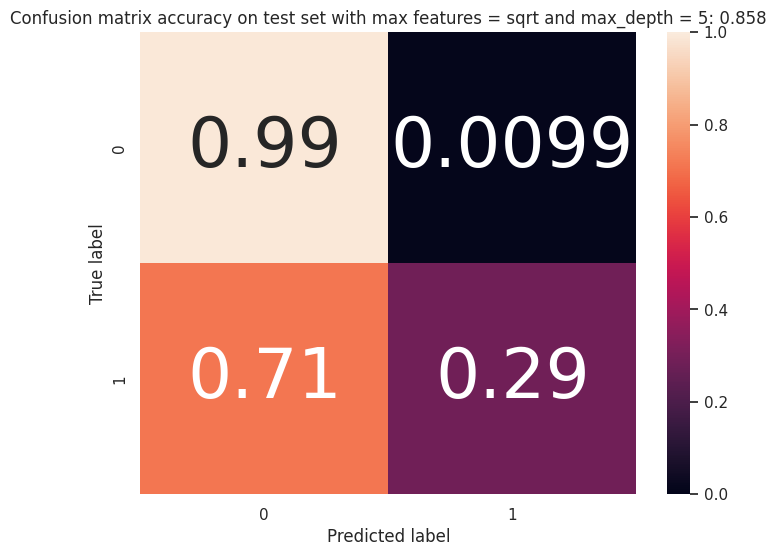

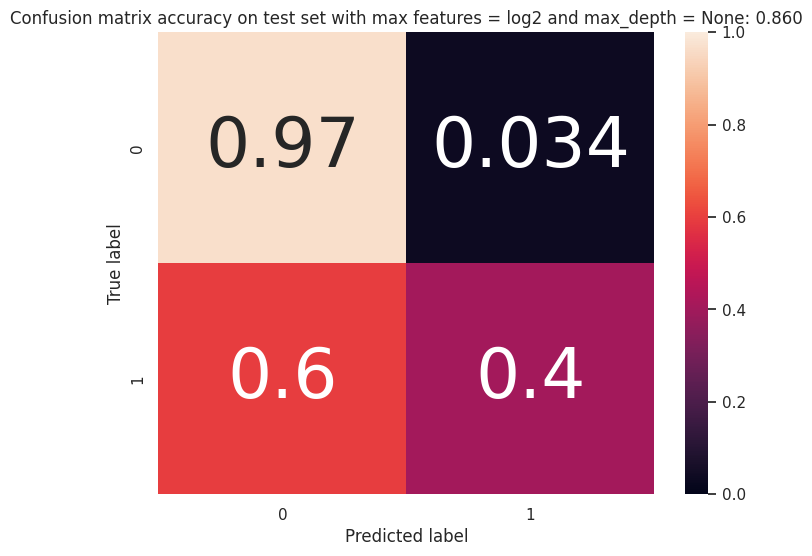

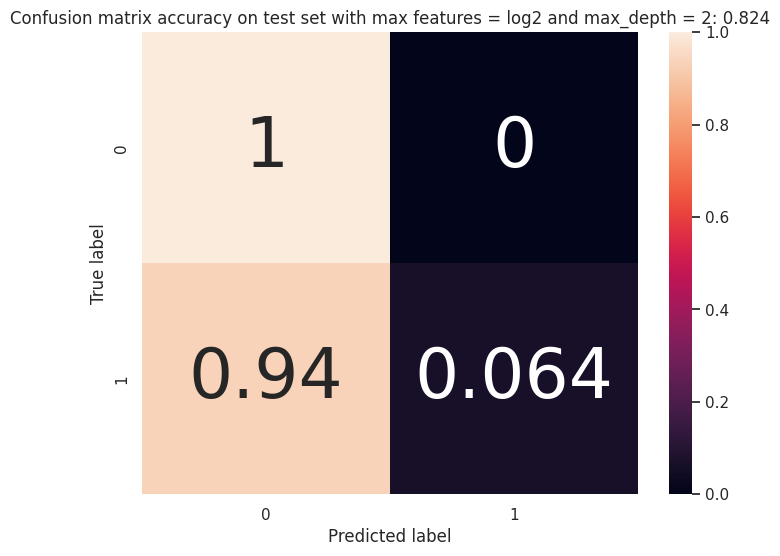

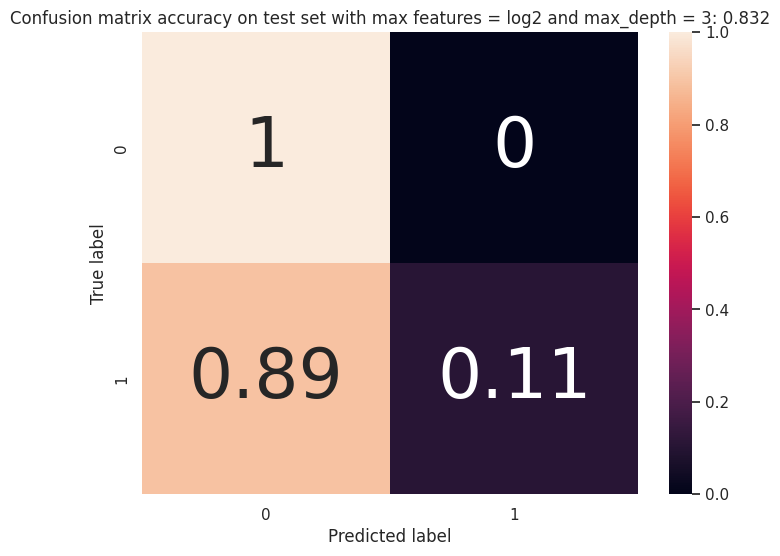

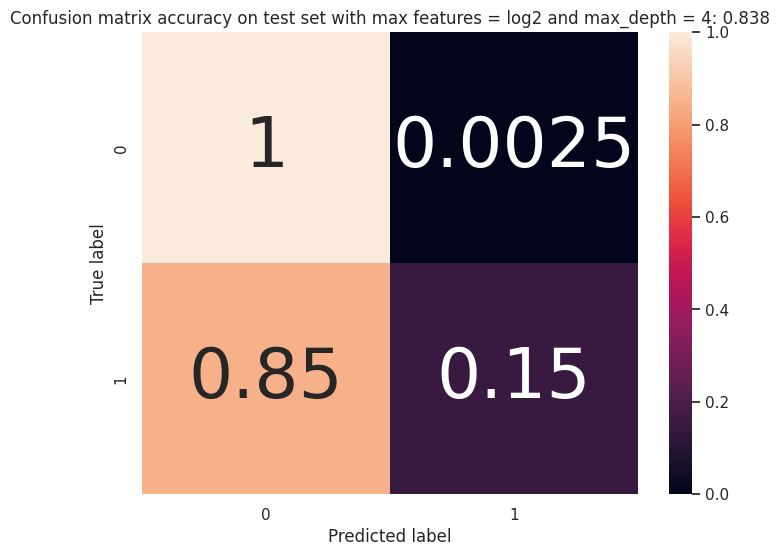

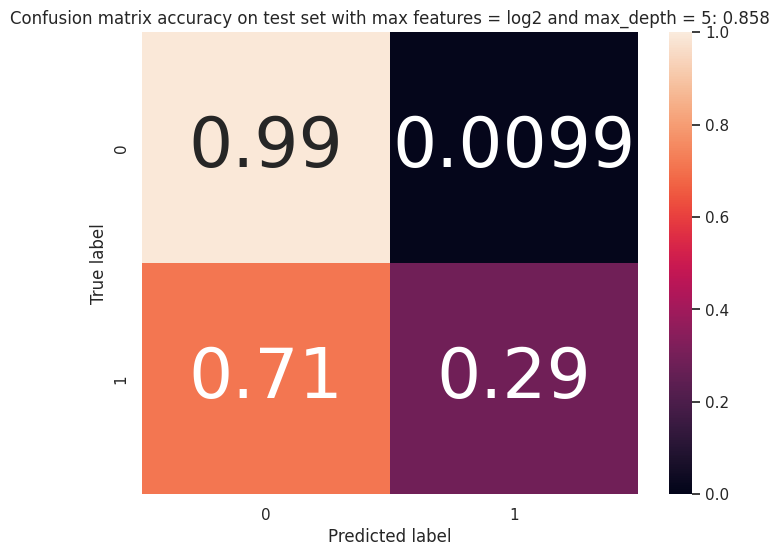

In [90]:
# Tunning Random Forest

from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators,
                                criterion='entropy',
                                max_features=f,
                                max_depth=d,
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    # Save the confusion matrix plot as a PNG file
    #plt.savefig(f'confusion_matrix_max_features_{f}_max_depth_{d}.png')

    # Close the current figure to free up memory
    #plt.close()

# 9. XGBoost

In [72]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

classifier=xgboost.XGBClassifier(tree_method='gpu_hist')

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}

clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)

# fitting it
clf.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=15, min_child_weight=5;, score=0.863 total time=   0.9s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=15, min_child_weight=5;, score=0.845 total time=   0.3s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=15, min_child_weight=5;, score=0.863 total time=   0.3s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=15, min_child_weight=5;, score=0.837 total time=   0.3s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=15, min_child_weight=5;, score=0.854 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=3, min_child_weight=7;, score=0.879 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=3, min_child_weight=7;, score=0.848 total time=   0.1s
[CV 3/5] END colsa

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [2, 3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [73]:
clf.best_params_

{'min_child_weight': 3,
 'max_depth': 2,
 'learning_rate': 0.15,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [74]:
# getting the model with the best parameters
clf.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

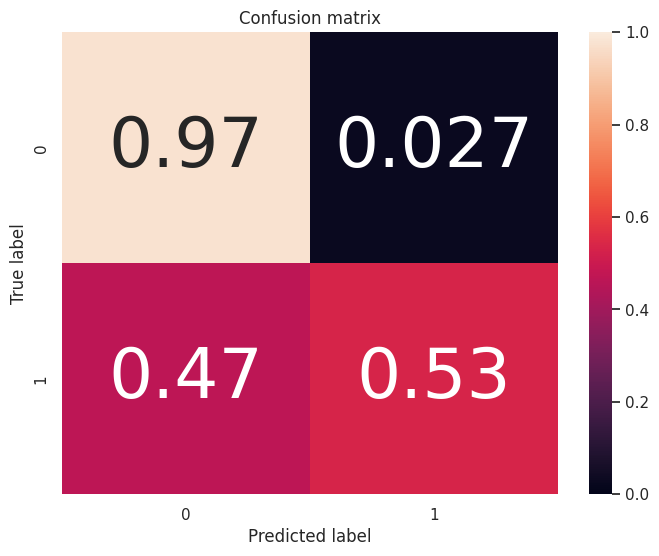

In [91]:
# fiting the model with the best parameters

final_model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=3,  monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

# fitting it
final_model.fit(X,y)

pred_xgboost = final_model.predict(X)

# Confusion Matrix
cm = confusion_matrix(y, pred_xgboost)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)
# Save the confusion matrix plot as a PNG file
plt.savefig('confusion_matrix_XGBoost.png')


In [79]:
validation_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
5000,5001,15598695,Fields,834,Germany,Female,68,9,130169.27,2,0,1,93112.20,0,0,5,GOLD,882
5001,5002,15649354,Johnston,754,Spain,Male,35,4,0.00,2,1,1,9658.41,0,0,1,SILVER,474
5002,5003,15737556,Vasilyev,590,France,Male,43,7,81076.80,2,1,1,182627.25,1,1,1,DIAMOND,253
5003,5004,15671610,Hooper,740,France,Male,36,7,0.00,1,1,1,13177.40,0,0,5,SILVER,466
5004,5005,15625092,Colombo,502,Germany,Female,57,3,101465.31,1,1,0,43568.31,1,1,5,SILVER,882


In [80]:
print(validation_df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')


In [81]:
# 9.2. Applying the same pre-processing stages

# Limiting the data
validation_df_new = validation_df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']].copy()

# dummy variables
validation_df_new = pd.get_dummies(validation_df_new, columns = ['Geography',
       'Gender','HasCrCard','IsActiveMember'])

#scaling
scale_vars = ['CreditScore','EstimatedSalary','Balance','Age']
validation_df_new[scale_vars] = scaler.fit_transform(validation_df_new[scale_vars])


validation_df_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
5000,0.968,0.675676,9,0.585642,2,0.465338,0,1,0,1,0,1,0,0,1
5001,0.808,0.229730,4,0.000000,2,0.047865,0,0,1,0,1,0,1,0,1
5002,0.480,0.337838,7,0.364771,2,0.913131,1,0,0,0,1,0,1,0,1
5003,0.780,0.243243,7,0.000000,1,0.065469,1,0,0,0,1,0,1,0,1
5004,0.304,0.527027,3,0.456501,1,0.217497,0,1,0,1,0,0,1,1,0


In [82]:
# 9.3. Making predictions

pred_xgboost = final_model.predict(validation_df_new.values)
pred_prob_xgboost = final_model.predict_proba(validation_df_new.values)

pred_xgboost

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
# probabilities
pred_prob_xgboost

array([[0.789771, 0.210229],
       [0.989041, 0.010959],
       [0.928327, 0.071673],
       ...,
       [0.783501, 0.216499],
       [0.932091, 0.067909],
       [0.893168, 0.106832]], dtype=float32)

In [84]:
# function to select second column for probabilities
def column(matrix, i):
    return [row[i] for row in matrix]

column(pred_prob_xgboost, 1)

[0.21022864,
 0.010958595,
 0.071673326,
 0.1896255,
 0.85295033,
 0.44097596,
 0.09114989,
 0.92944026,
 0.14764248,
 0.019893294,
 0.9498982,
 0.37340176,
 0.01772831,
 0.39544284,
 0.045304377,
 0.117805764,
 0.027686505,
 0.045085464,
 0.61819214,
 0.5451307,
 0.4979689,
 0.057566613,
 0.08249361,
 0.15061787,
 0.46659887,
 0.045328755,
 0.049246535,
 0.040470555,
 0.306989,
 0.020781903,
 0.036598153,
 0.15881805,
 0.33958116,
 0.30075243,
 0.078801945,
 0.1857088,
 0.58296716,
 0.04754549,
 0.43889987,
 0.051572237,
 0.09622767,
 0.019898152,
 0.018686222,
 0.10611109,
 0.03285283,
 0.3907612,
 0.15199777,
 0.046179686,
 0.17196752,
 0.0926954,
 0.04873314,
 0.14711961,
 0.086293265,
 0.22718737,
 0.23901415,
 0.014059871,
 0.08617514,
 0.9701469,
 0.0316374,
 0.019022215,
 0.1034913,
 0.07609643,
 0.15710647,
 0.15455368,
 0.1677737,
 0.0947873,
 0.0128234895,
 0.45311654,
 0.05289129,
 0.015312687,
 0.0858134,
 0.03561217,
 0.102081805,
 0.07621125,
 0.113866664,
 0.03251784,
 

In [85]:
# 9.4. Joining the validation data with the predictions

output = validation_df_new.copy()
output['Predictions - Churn or Not'] = pred_xgboost
output['Predictions - Probability to Churn'] = column(pred_prob_xgboost, 1)
output['Predictions - Churn or Not Desc'] = 'Empty'
output['Predictions - Churn or Not Desc'][output['Predictions - Churn or Not'] == 0] = 'Retention'
output['Predictions - Churn or Not Desc'][output['Predictions - Churn or Not'] == 1] = 'Churn'
output.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1,Predictions - Churn or Not,Predictions - Probability to Churn,Predictions - Churn or Not Desc
5000,0.968,0.675676,9,0.585642,2,0.465338,0,1,0,1,0,1,0,0,1,0,0.210229,Retention
5001,0.808,0.229730,4,0.000000,2,0.047865,0,0,1,0,1,0,1,0,1,0,0.010959,Retention
5002,0.480,0.337838,7,0.364771,2,0.913131,1,0,0,0,1,0,1,0,1,0,0.071673,Retention
5003,0.780,0.243243,7,0.000000,1,0.065469,1,0,0,0,1,0,1,0,1,0,0.189626,Retention
5004,0.304,0.527027,3,0.456501,1,0.217497,0,1,0,1,0,0,1,1,0,1,0.852950,Churn


In [92]:
# 9.5. Exporting the data in a Excel
output.to_excel('Churn Predictions Output.xlsx', index=False)


os. getcwd()

'/content'